In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# data preprocessing

In [7]:
df=pd.read_excel(r'D:\Sousan\internship\NFLX1.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1617 entries, 0 to 1616
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1617 non-null   datetime64[ns]
 1   Open       1617 non-null   float64       
 2   High       1617 non-null   float64       
 3   Low        1617 non-null   float64       
 4   Close      1617 non-null   float64       
 5   Adj Close  1617 non-null   float64       
 6   Volume     1617 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 88.6 KB


In [23]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_returns
Date,,,,,,,
2016-01-04,109.000000,110.000000,105.209999,109.959999,109.959999,20794800,NaN
2016-01-05,110.449997,110.580002,105.849998,107.660004,107.660004,17664600,-0.020917
2016-01-06,105.290001,117.910004,104.959999,117.680000,117.680000,33045700,0.093071
2016-01-07,116.360001,122.180000,112.290001,114.559998,114.559998,33636700,-0.026513
2016-01-08,116.330002,117.720001,111.099998,111.389999,111.389999,18067100,-0.027671


## setting date to index

In [9]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,109.000000,110.000000,105.209999,109.959999,109.959999,20794800
2016-01-05,110.449997,110.580002,105.849998,107.660004,107.660004,17664600
2016-01-06,105.290001,117.910004,104.959999,117.680000,117.680000,33045700
2016-01-07,116.360001,122.180000,112.290001,114.559998,114.559998,33636700
2016-01-08,116.330002,117.720001,111.099998,111.389999,111.389999,18067100


## EDA

Text(0.5, 1.0, ' Netflix Stock Plot for Overall Period')

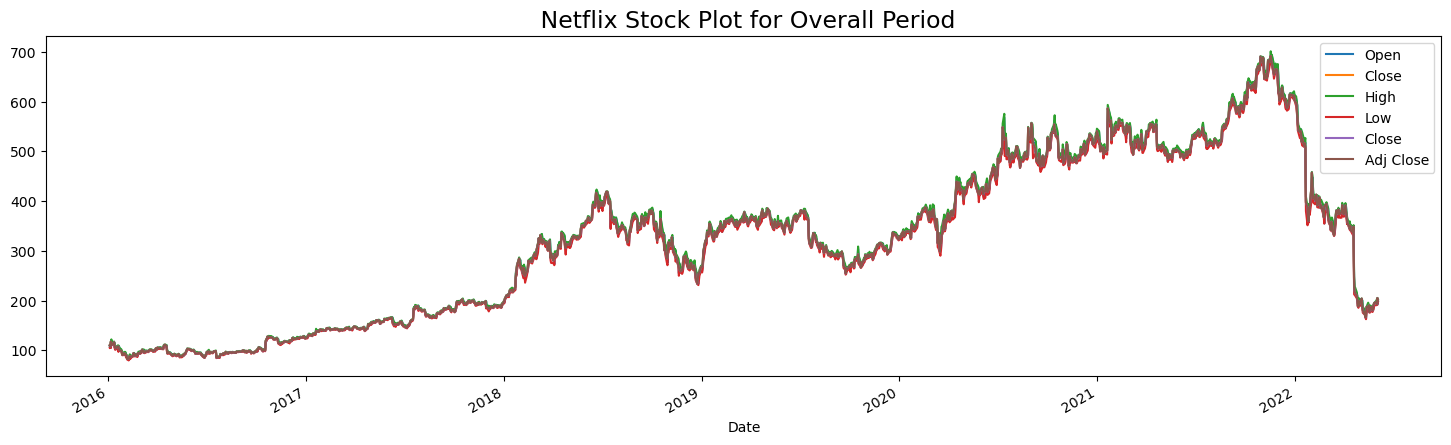

In [10]:
df[['Open', 'Close', 'High','Low','Close','Adj Close']].plot(figsize=(18,5))
plt.title(" Netflix Stock Plot for Overall Period", fontsize=17)

## Top-5 Dates with Highest Stock Price

In [11]:
a = df.sort_values(by='High',ascending= False).head(5)
a['High']

Date
2021-11-17    700.989990
2021-11-19    694.159973
2021-11-18    691.739990
2021-10-29    690.969971
2021-11-01    689.969971
Name: High, dtype: float64

## Top-5 Dates with Lowest Stock Price

In [12]:
b = df.sort_values(by='Low',ascending= True).head(5)
b['Low']

Date
2016-02-08    79.949997
2016-02-09    81.550003
2016-02-05    81.860001
2016-02-11    82.910004
2016-07-19    84.500000
Name: Low, dtype: float64

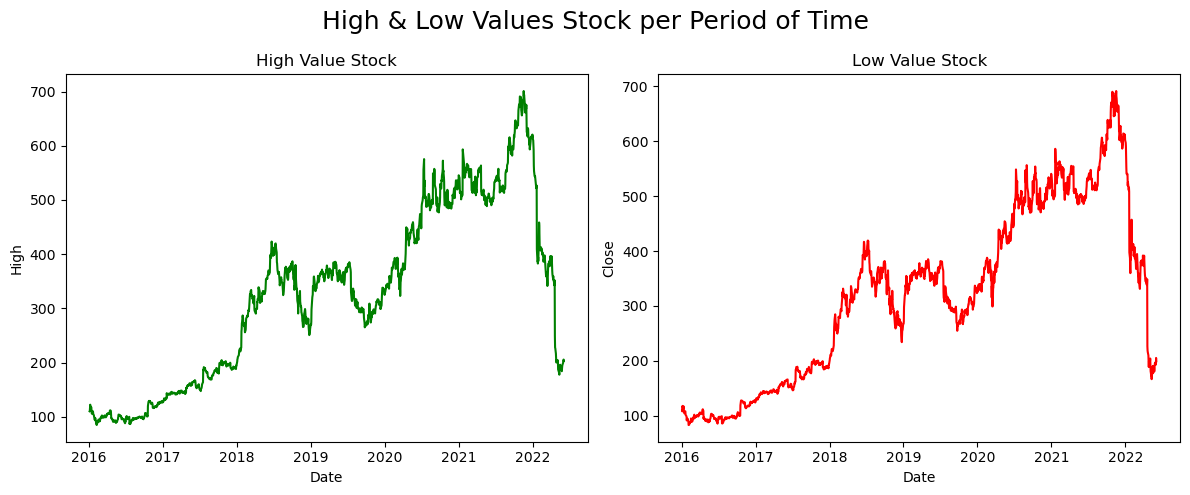

In [13]:
fig,axes= plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(12,5))
fig.suptitle('High & Low Values Stock per Period of Time',fontsize=18)
sns.lineplot(ax= axes[0], y=df['High'],x=df.index, color='green')
axes[0].set_title('High Value Stock')
sns.lineplot(ax= axes[1], y=df['Close'], x=df.index, color='red')
axes[1].set_title('Low Value Stock')
plt.tight_layout()
plt.show()

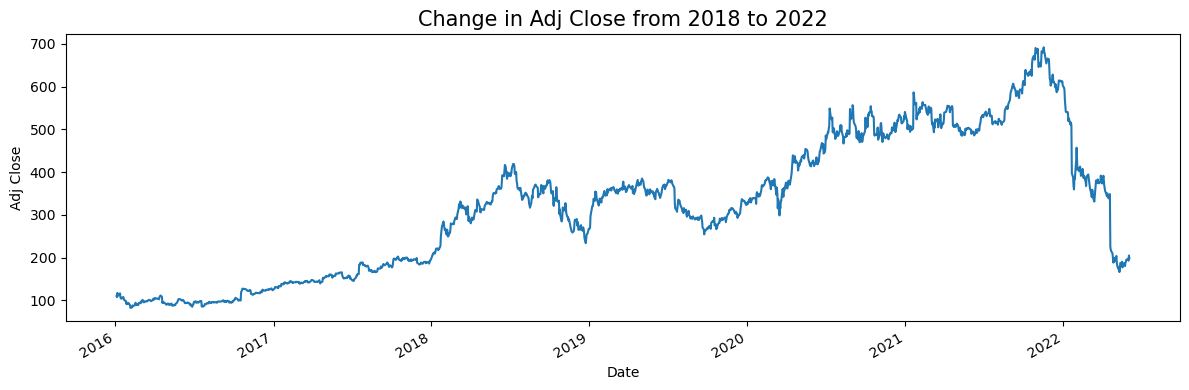

In [14]:
plt.figure(figsize=(12,4))
df['Adj Close'].plot()
plt.xlabel('Date', fontsize= 10)
plt.ylabel('Adj Close',fontsize= 10)
plt.title('Change in Adj Close from 2018 to 2022',fontsize= 15)
plt.tight_layout()

## Netflix Stock Daily Returns 

In [15]:
df['Daily_returns'] = df['Adj Close'].pct_change()
df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_returns
Date,,,,,,,
2016-01-04,109.000000,110.000000,105.209999,109.959999,109.959999,20794800,NaN
2016-01-05,110.449997,110.580002,105.849998,107.660004,107.660004,17664600,-0.020917
2016-01-06,105.290001,117.910004,104.959999,117.680000,117.680000,33045700,0.093071
2016-01-07,116.360001,122.180000,112.290001,114.559998,114.559998,33636700,-0.026513
2016-01-08,116.330002,117.720001,111.099998,111.389999,111.389999,18067100,-0.027671


## Best Day of Stock

In [16]:
df[df['Daily_returns']==df['Daily_returns'].max()]['Daily_returns']

Date
2016-10-18    0.190281
Name: Daily_returns, dtype: float64

## Worst day of Stock

In [17]:
df[df['Daily_returns']==df['Daily_returns'].min()]['Daily_returns']

Date
2022-04-20   -0.351166
Name: Daily_returns, dtype: float64

Text(0.5, 1.0, 'Netflix Stock Daily Returns')

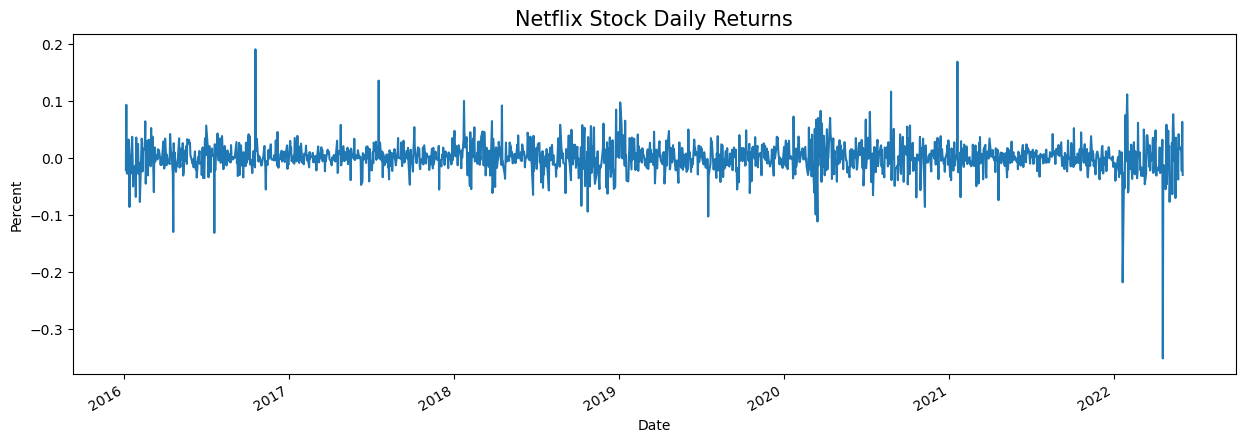

In [18]:
plt.figure(figsize=(15,5))
df['Daily_returns'].plot()
plt.xlabel("Date")
plt.ylabel("Percent")
plt.title("Netflix Stock Daily Returns",fontsize= 15 )

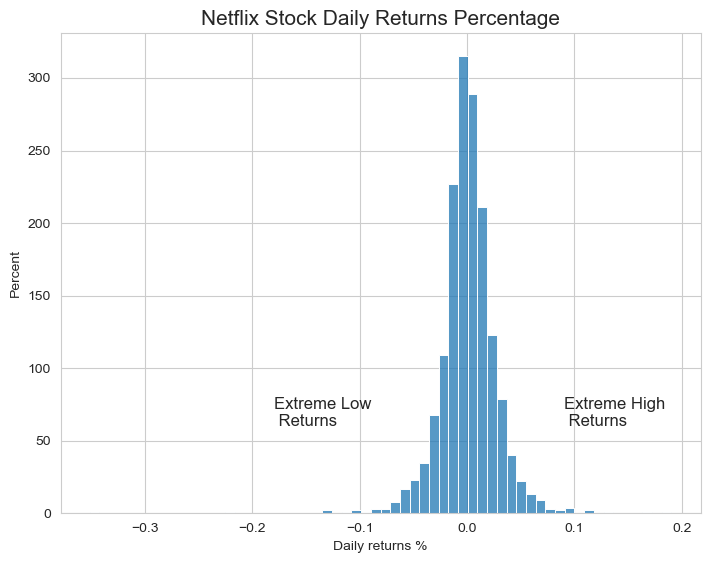

In [19]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
sns.histplot(data= df['Daily_returns'], bins=60)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("Netflix Stock Daily Returns Percentage",fontsize= 15 )
ax1.text(-0.18,60,"Extreme Low\n Returns",fontsize= 12)
ax1.text(0.09,60,"Extreme High\n Returns", fontsize= 12)
plt.show()

## Moving Average of Stock

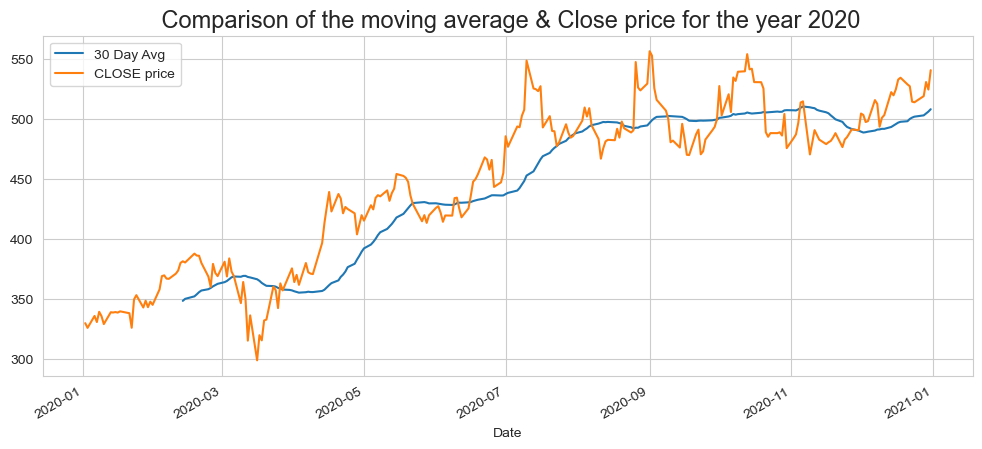

In [20]:
sns.set_style('whitegrid')
f= plt.figure(figsize=(12,5))
df['Close'].loc['2020-01-01': '2020-12-31'].rolling(window=30).mean().plot(label='30 Day Avg')
df['Close'].loc['2020-01-01':'2020-12-31'].plot(label='CLOSE price')
plt.title(" Comparison of the moving average & Close price for the year 2020", fontsize=17)
plt.legend()

In [21]:
# Preprocess the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

# Create the training and testing datasets
X_train = []
y_train = []
for i in range(60, len(data_scaled)):
    X_train.append(data_scaled[i-60:i])
    y_train.append(data_scaled[i])
X_train, y_train = np.array(X_train), np.array(y_train)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions
X_test = data_scaled[-60:]
X_test = np.expand_dims(X_test, axis=0)
predicted_price = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price)
print('Predicted price:', predicted_price)

Epoch 1/10
49/49 [==============================] - 13s 88ms/step - loss: 0.0171
Epoch 2/10
49/49 [==============================] - 4s 88ms/step - loss: 0.0016
Epoch 3/10
49/49 [==============================] - 4s 87ms/step - loss: 0.0015
Epoch 4/10
49/49 [==============================] - 4s 87ms/step - loss: 0.0014
Epoch 5/10
49/49 [==============================] - 4s 87ms/step - loss: 0.0013
Epoch 6/10
49/49 [==============================] - 4s 87ms/step - loss: 0.0012
Epoch 7/10
49/49 [==============================] - 4s 87ms/step - loss: 0.0011
Epoch 8/10
49/49 [==============================] - 4s 86ms/step - loss: 0.0011
Epoch 9/10
49/49 [==============================] - 4s 87ms/step - loss: 0.0010
Epoch 10/10
1/1 [==============================] - 2s 2s/step
Predicted price: [[195.54736]]
